In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import rawpy, PIL

(4020, 6024, 3)


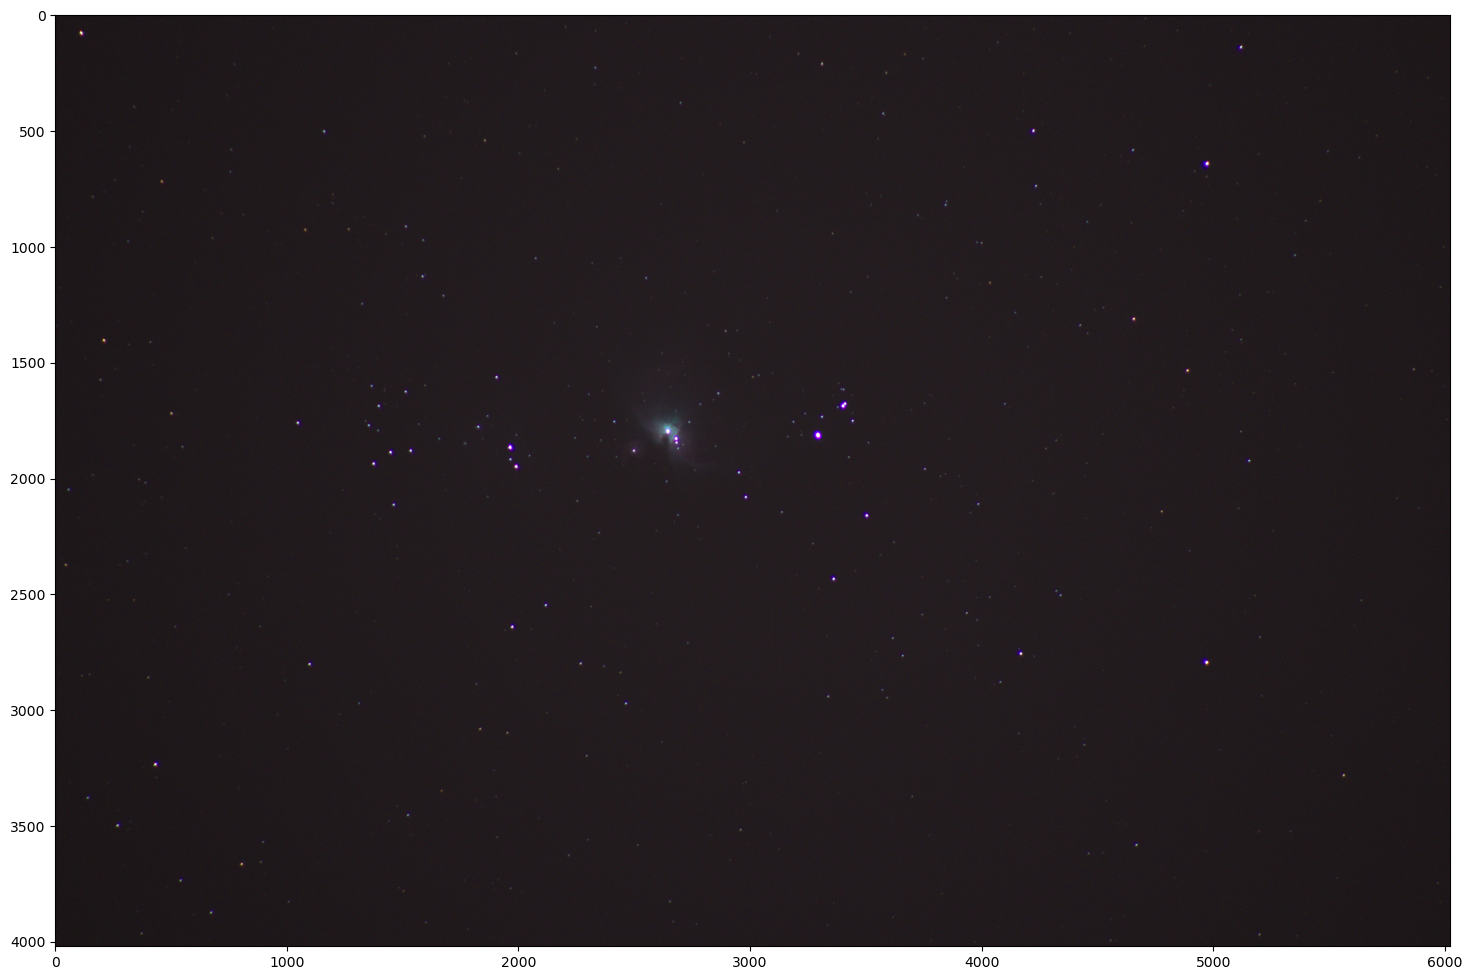

In [5]:

# Should use with instead when done

raw = rawpy.imread('../photos/lights/IMG_0189.CR3')
params = {'use_camera_wb':True, 'no_auto_scale':False,'no_auto_bright':True,
          'chromatic_aberration':(1,1)}

rgb = raw.postprocess(**params)
print(rgb.shape)

size=18
plt.figure(figsize=(size,size))
plt.imshow(rgb)
plt.show()

## Now that we have our image lets filter out the low and high ends and select sources within this range

In [38]:
def get_grayscale(pic):
    # Use NTSC format for grayscale
    return 0.299*pic[:,:,0] + 0.587*pic[:,:,1] + 0.114*pic[:,:,2]

def bright_finding(pic, threshold=0.5, upper_cuttof=0.95):
    gray = get_grayscale(pic)
    # Cutoff the upper 5% of pixels
    upper = 255*upper_cuttof # Assume 8-bit color info
    lower = 255*threshold

    new_pic = np.zeros_like(gray)
    new_pic[np.logical_and(gray<upper,gray<lower)] = 1
    return new_pic



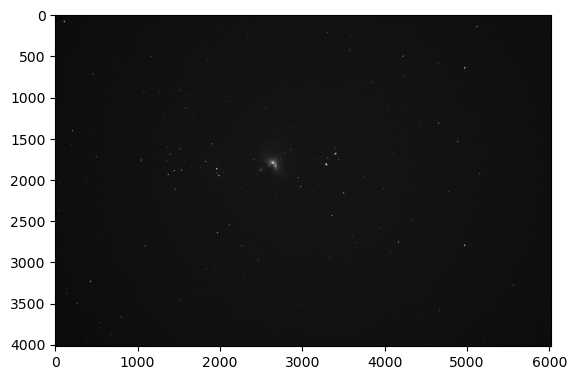

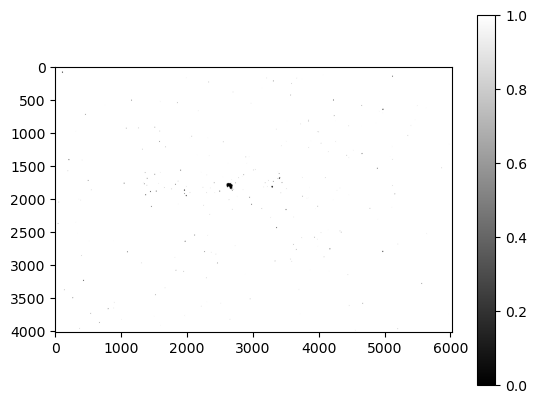

In [42]:
plt.imshow(get_grayscale(rgb), cmap='gray')
plt.show()

plt.imshow(bright_finding(rgb,threshold=0.3), cmap='gray')
plt.colorbar()
plt.show()